In [2]:
import numpy as np
import pandas as pd
import optuna
import seaborn as sns
import shap
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error as MAE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("train.csv")
df

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.489723,0.435764,34.769578,5628.71053
14996,14996,131.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.506988,0.458076,36.362837,6331.86722
14997,14997,444.0,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.615612,0.514570,45.718182,8413.65966
14998,14998,461.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.551234,0.463896,38.130192,6620.09877


In [4]:
df_test = pd.read_csv("test.csv")
df_test

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,402.0,12.5,0.25,0.38,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.459088,0.408610,33.289052
1,15001,450.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.535895,0.442529,36.957873
2,15002,594.0,25.0,0.50,0.25,0.63,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.421449,0.401068,32.417872
3,15003,554.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.509158,0.455453,36.362937
4,15004,307.0,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.553671,0.455405,38.826364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,613.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.425634,0.439423,31.448420
9996,24996,323.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.460510,0.405525,32.505741
9997,24997,472.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.501777,0.448609,36.805034
9998,24998,507.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.467905,0.407705,32.658496


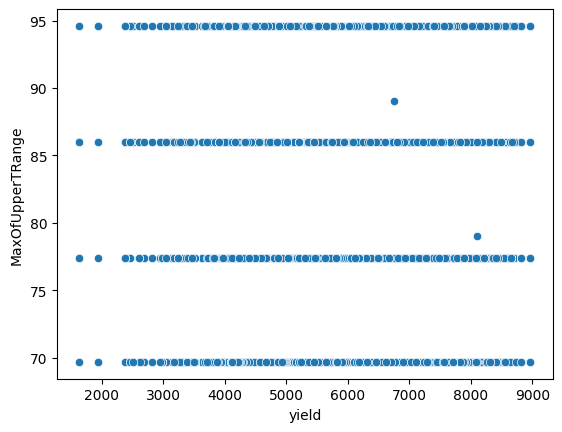

In [5]:
sns.scatterplot(x='yield', y='MaxOfUpperTRange', data=df)
plt.show()

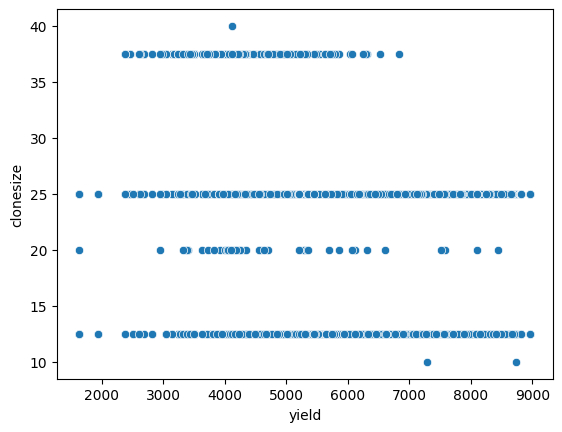

In [6]:
sns.scatterplot(x='yield', y='clonesize', data=df)
plt.show()

# Changlatuvchilar uchun label-encoding

In [7]:
bins = [0, 15, 30, float('inf')]
labels = [1, 2, 3]  
df['clonesize_encoded'] = pd.cut(df['clonesize'], bins=bins, labels=labels, right=True)

bins = [-1, 5, 15, float('inf')]
labels = [1, 2, 3]  
df['honeybee_encoded'] = pd.cut(df['honeybee'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.3, float('inf')]
labels = [1, 2, 3]  
df['bumbles_encoded'] = pd.cut(df['bumbles'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.45, 0.55, 0.65, float('inf')]
labels = [1, 2, 3, 4, 5]  
df['andrena_encoded'] = pd.cut(df['andrena'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.3, 0.4, 0.55, 0.7, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  
df['osmia_encoded'] = pd.cut(df['osmia'], bins=bins, labels=labels, right=True)

df

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,...,AverageRainingDays,fruitset,fruitmass,seeds,yield,clonesize_encoded,honeybee_encoded,bumbles_encoded,andrena_encoded,osmia_encoded
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,...,0.26,0.477941,0.423927,34.043022,6079.08526,1,1,2,2,6
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,...,0.06,0.334594,0.354415,27.735098,2946.92602,2,1,1,1,1
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,...,0.56,0.468192,0.417915,34.838815,5323.30034,2,1,2,5,5
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,...,0.39,0.500558,0.427431,35.134955,6157.05484,2,1,2,2,6
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,...,0.39,0.520181,0.464067,37.029180,6992.82314,1,1,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,...,0.39,0.489723,0.435764,34.769578,5628.71053,2,1,3,2,4
14996,14996,131.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,...,0.26,0.506988,0.458076,36.362837,6331.86722,1,1,2,2,4
14997,14997,444.0,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,...,0.10,0.615612,0.514570,45.718182,8413.65966,1,1,3,3,4
14998,14998,461.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,...,0.26,0.551234,0.463896,38.130192,6620.09877,1,1,2,2,6


In [8]:
bins = [0, 15, 30, float('inf')]
labels = [1, 2, 3]  
df_test['clonesize_encoded'] = pd.cut(df_test['clonesize'], bins=bins, labels=labels, right=True)

bins = [-1, 5, 15, float('inf')]
labels = [1, 2, 3]  
df_test['honeybee_encoded'] = pd.cut(df_test['honeybee'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.3, float('inf')]
labels = [1, 2, 3]  
df_test['bumbles_encoded'] = pd.cut(df_test['bumbles'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.45, 0.55, 0.65, float('inf')]
labels = [1, 2, 3, 4, 5]  
df_test['andrena_encoded'] = pd.cut(df_test['andrena'], bins=bins, labels=labels, right=True)

bins = [-1, 0.2, 0.3, 0.4, 0.55, 0.7, float('inf')]
labels = [1, 2, 3, 4, 5, 6]  
df_test['osmia_encoded'] = pd.cut(df_test['osmia'], bins=bins, labels=labels, right=True)

df_test

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,...,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,clonesize_encoded,honeybee_encoded,bumbles_encoded,andrena_encoded,osmia_encoded
0,15000,402.0,12.5,0.25,0.38,0.38,0.75,69.7,42.1,58.2,...,34.0,0.56,0.459088,0.408610,33.289052,1,1,3,2,6
1,15001,450.0,25.0,0.50,0.38,0.38,0.50,94.6,57.2,79.0,...,1.0,0.10,0.535895,0.442529,36.957873,2,1,3,2,4
2,15002,594.0,25.0,0.50,0.25,0.63,0.75,77.4,46.8,64.7,...,34.0,0.56,0.421449,0.401068,32.417872,2,1,2,4,6
3,15003,554.0,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,...,1.0,0.10,0.509158,0.455453,36.362937,2,1,2,3,6
4,15004,307.0,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,...,1.0,0.10,0.553671,0.455405,38.826364,1,1,2,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,613.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,...,16.0,0.26,0.425634,0.439423,31.448420,2,1,3,3,4
9996,24996,323.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,...,34.0,0.56,0.460510,0.405525,32.505741,1,1,2,5,5
9997,24997,472.0,25.0,0.50,0.25,0.38,0.63,94.6,57.2,79.0,...,34.0,0.56,0.501777,0.448609,36.805034,2,1,2,2,5
9998,24998,507.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,...,16.0,0.26,0.467905,0.407705,32.658496,2,1,2,3,4


In [ ]:
print(df.columns)
print(df_test.columns)

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded',
       'andrena_encoded', 'osmia_encoded'],
      dtype='object')
Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded',
       'andrena_encoded', 'osmia_encoded'],
      dtype='object')


In [10]:
X = df.drop(columns=["yield", 'clonesize', 'honeybee', 'bumbles', 'andrena'], axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressior uchun model

In [11]:
rfr_model = RandomForestRegressor(random_state=42)
# yoki `model = DecisionTreeRegressor(random_state=42)` ham foydalanishingiz mumkin

rfr_model.fit(X_train, y_train)

# Bashorat qilish va natijalarni baholash
rfr_y_pred = rfr_model.predict(X_test)

# Modelni baholash
rfr_mae = MAE(y_test, rfr_y_pred)
rfr_mae

np.float64(253.37341797286683)

# DT regressor uchun model

In [26]:
X = df.drop(columns=["yield", 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded', 'andrena_encoded'], axis=1)
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree_model = DecisionTreeRegressor(random_state=42, max_depth=6)

dtree_model.fit(X_train, y_train)

# Bashorat qilish va natijalarni baholash
dtree_y_pred = dtree_model.predict(X_test)

# Modelni baholash
dtree_mae = MAE(y_test, dtree_y_pred)
dtree_mae
df_test_pr = df_test.drop(columns=['andrena_encoded', 'bumbles_encoded', 'clonesize_encoded', 'honeybee_encoded'])
y_pred = dtree_model.predict(df_test_pr)

subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred
subm.to_csv("3_urinish.csv", index=False)

In [27]:
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE

# Ma'lumotlar
X = df.drop(columns=["yield", 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded', 'andrena_encoded'], axis=1)
y = df['yield']

# Train-test ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna o'rganish funksiyasi
def objective(trial):
    # Parametrlarni tanlash
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    # Modelni yaratish
    dtree_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    
    # Modelni o'rgatish
    dtree_model.fit(X_train, y_train)
    
    # Bashorat qilish
    dtree_y_pred = dtree_model.predict(X_test)
    
    # MAE ni hisoblash
    return MAE(y_test, dtree_y_pred)

# Optuna izlanishi
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # 100 ta sinov

# Eng yaxshi parametrlarni olish
best_params = study.best_params
print("Eng yaxshi parametrlar:", best_params)

# Eng yaxshi modelni yaratish
best_dtree_model = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Modelni o'rgatish
best_dtree_model.fit(X_train, y_train)

# Test to'plamida bashorat qilish
best_dtree_y_pred = best_dtree_model.predict(X_test)

# Modelni baholash
best_dtree_mae = MAE(y_test, best_dtree_y_pred)
print("Eng yaxshi model MAE:", best_dtree_mae)

# Test to'plamida bashorat qilish va natijalarni saqlash
df_test_pr = df_test.drop(columns=['andrena_encoded', 'bumbles_encoded', 'clonesize_encoded', 'honeybee_encoded'])
y_pred = best_dtree_model.predict(df_test_pr)

subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred
subm.to_csv("4_urinish.csv", index=False)


[I 2024-11-04 18:54:59,951] A new study created in memory with name: no-name-94333550-c0e7-419c-bb03-ff0933a79f8c
[I 2024-11-04 18:55:00,104] Trial 0 finished with value: 265.96599887621954 and parameters: {'max_depth': 9, 'min_samples_split': 7}. Best is trial 0 with value: 265.96599887621954.
[I 2024-11-04 18:55:00,182] Trial 1 finished with value: 251.14178980288392 and parameters: {'max_depth': 5, 'min_samples_split': 12}. Best is trial 1 with value: 251.14178980288392.
[I 2024-11-04 18:55:00,417] Trial 2 finished with value: 340.195873912185 and parameters: {'max_depth': 20, 'min_samples_split': 9}. Best is trial 1 with value: 251.14178980288392.
[I 2024-11-04 18:55:00,536] Trial 3 finished with value: 264.2968483081353 and parameters: {'max_depth': 9, 'min_samples_split': 20}. Best is trial 1 with value: 251.14178980288392.
[I 2024-11-04 18:55:00,730] Trial 4 finished with value: 326.1184744600297 and parameters: {'max_depth': 15, 'min_samples_split': 5}. Best is trial 1 with val

Eng yaxshi parametrlar: {'max_depth': 6, 'min_samples_split': 14}
Eng yaxshi model MAE: 250.04639063030527


In [24]:
df_test_pr = df_test.drop(columns=['andrena', 'bumbles', 'clonesize', 'honeybee'])
y_pred = dtree_model.predict(df_test_pr)

subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred
subm.to_csv("2_urinish.csv", index=False)

# Liner Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Logistic Regression model yaratish va o'qitish
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Bashorat qilish
lin_y_pred = lin_model.predict(X_test)

# Modelni baholash
lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mae

np.float64(277.29702245791145)

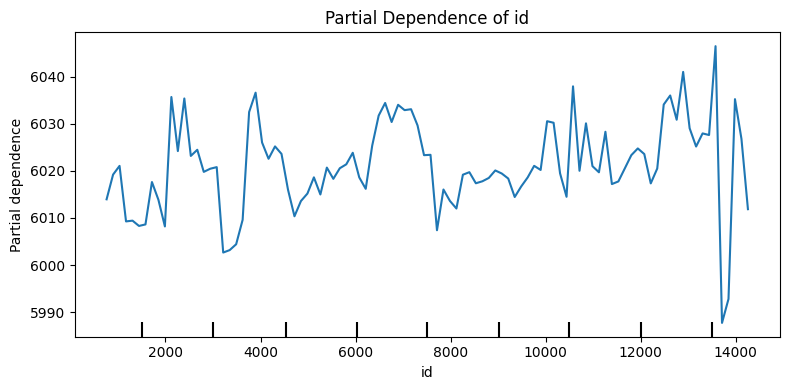

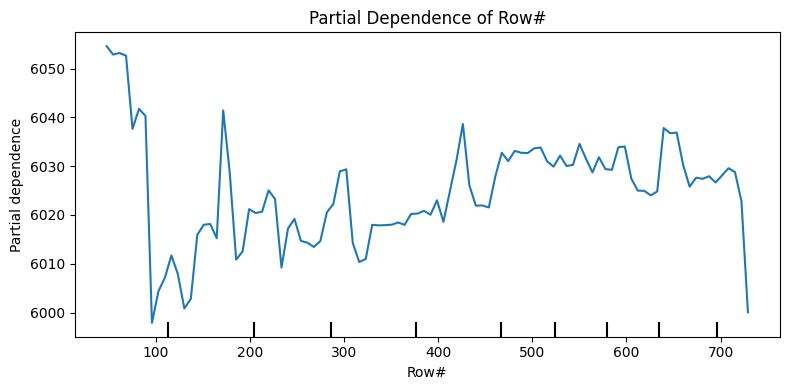

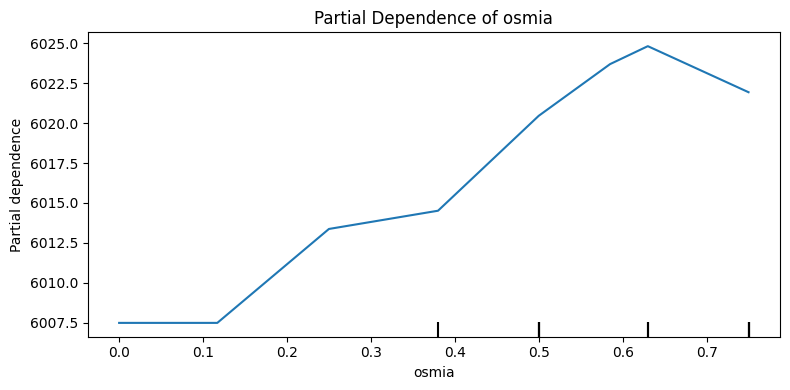

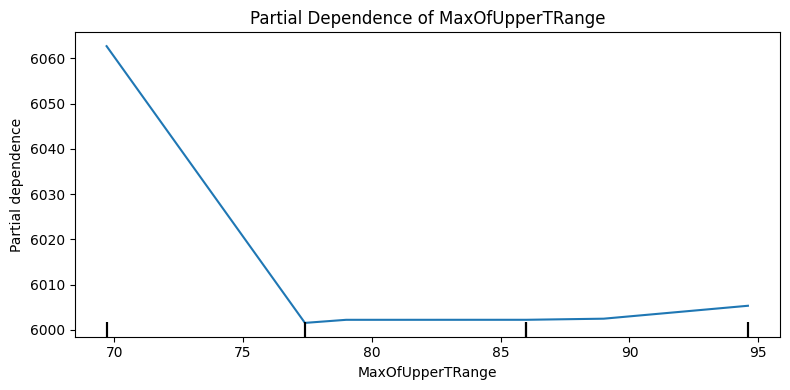

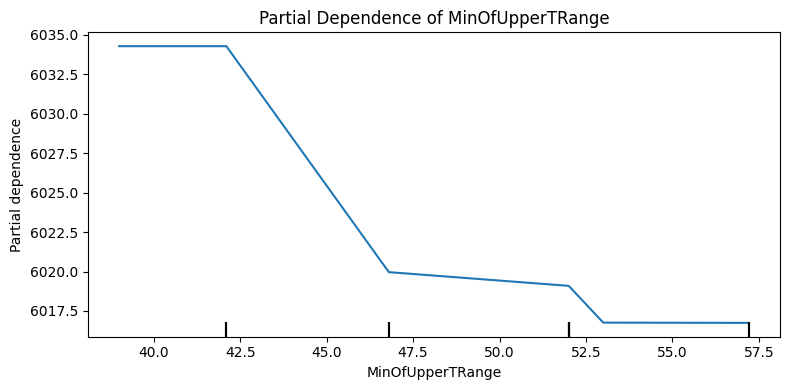

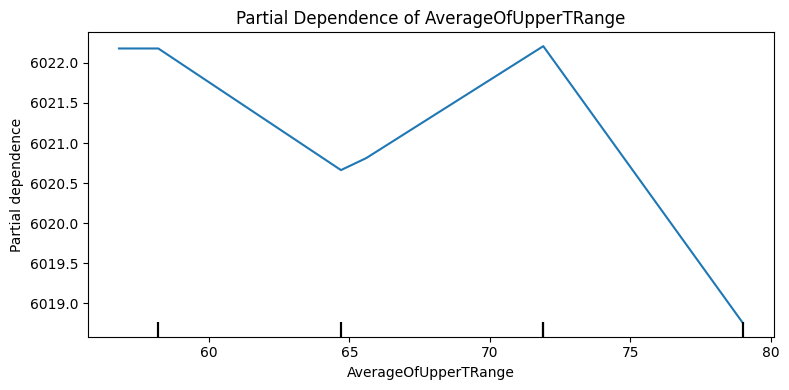

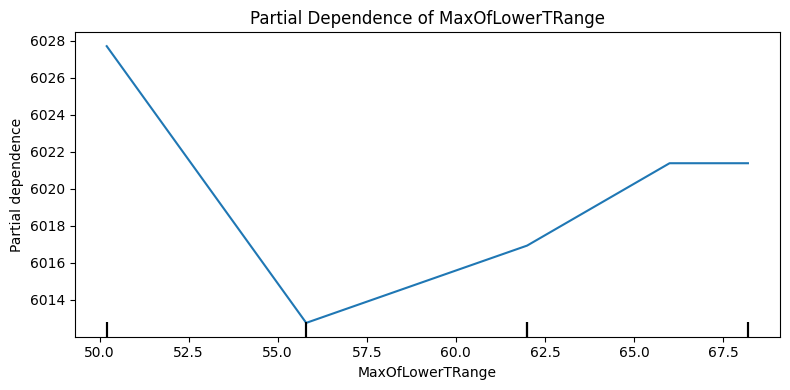

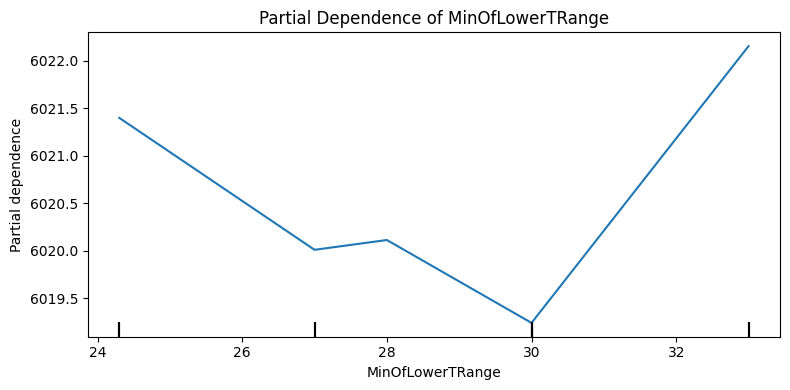

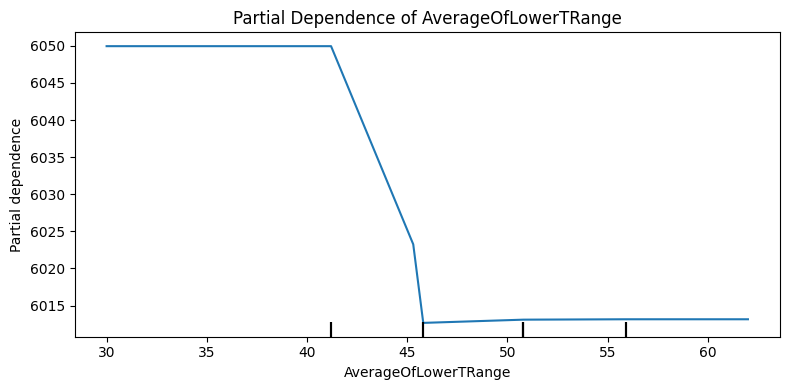

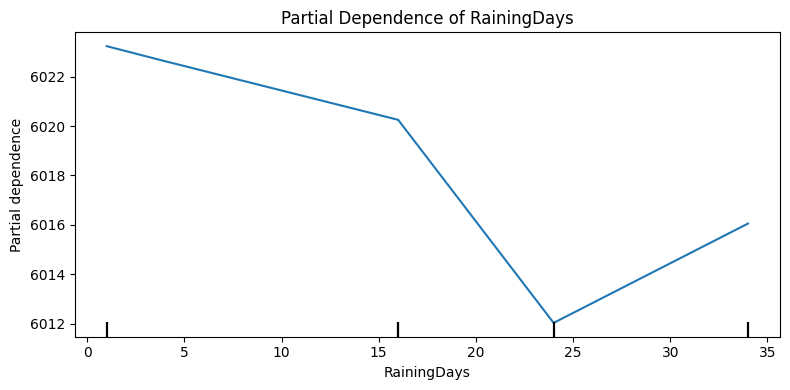

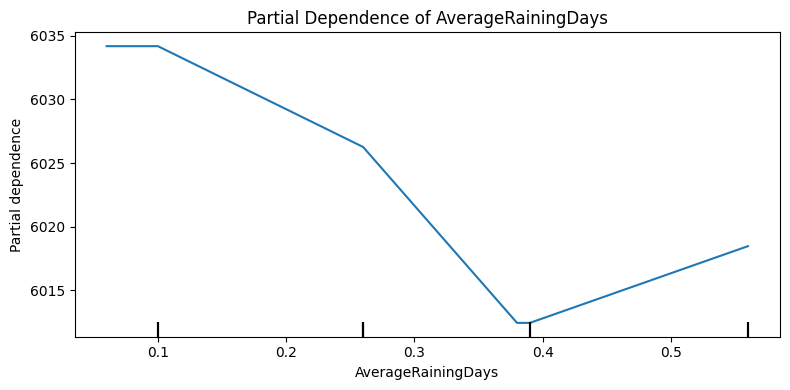

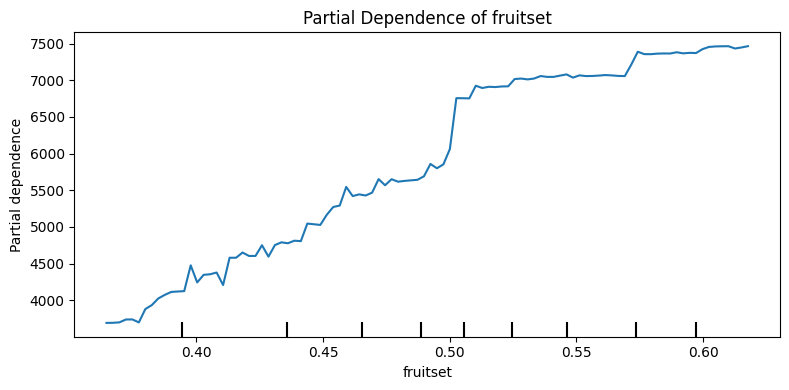

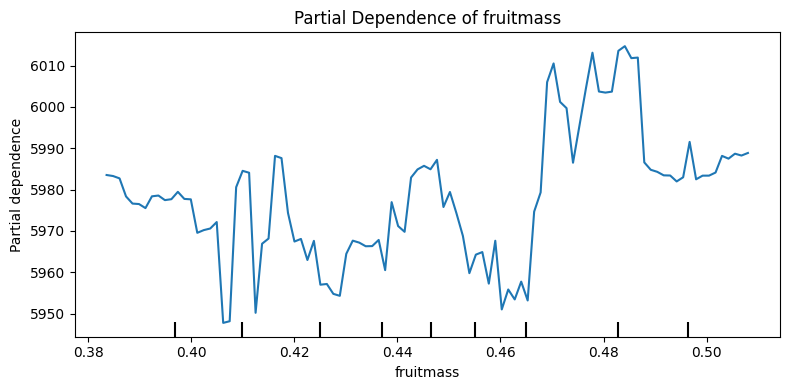

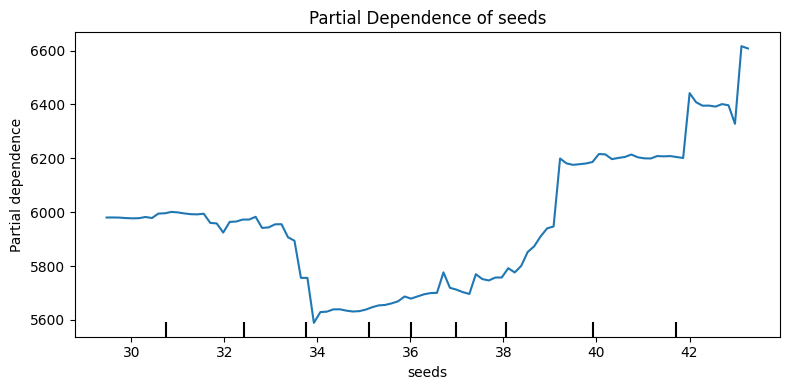

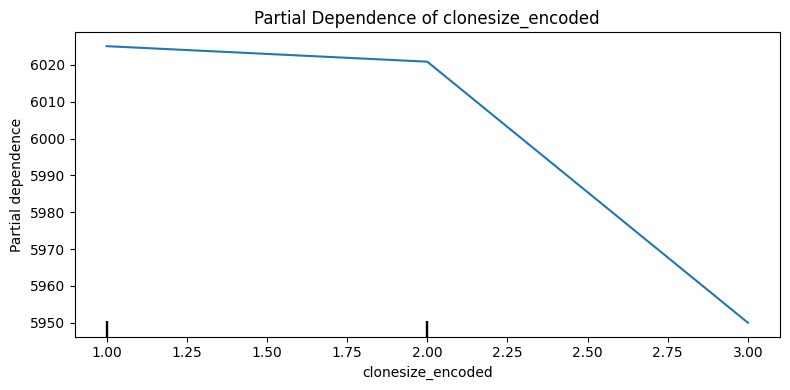

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


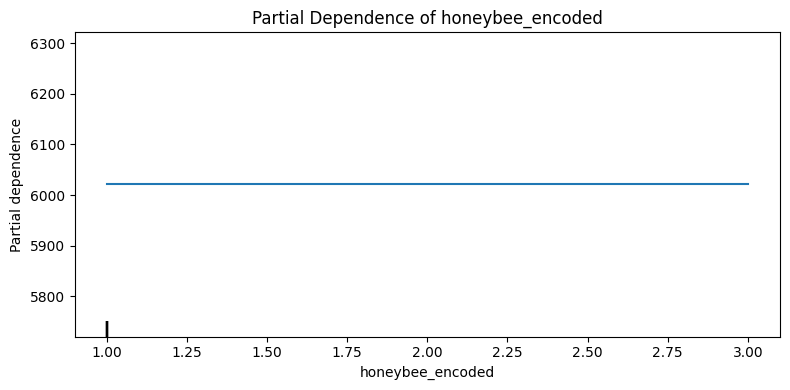

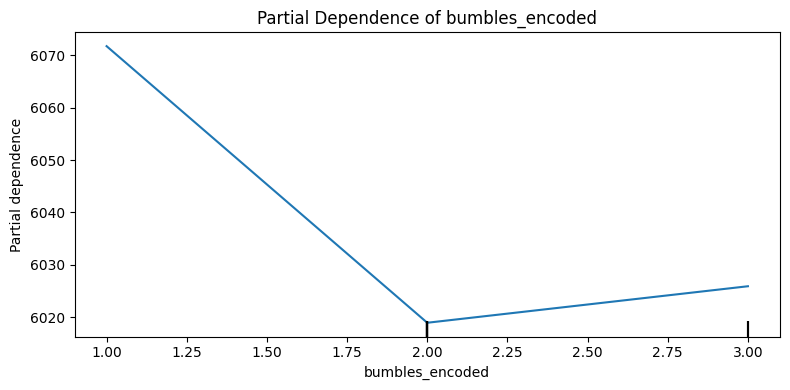

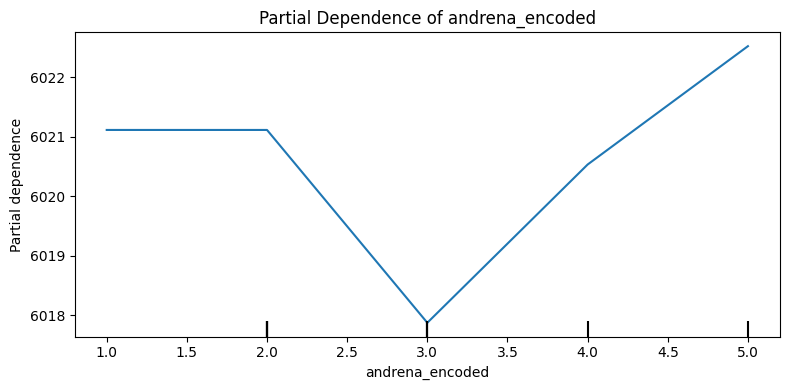

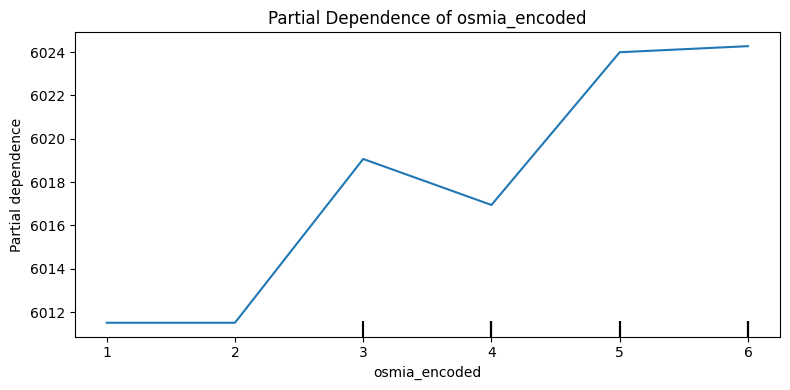

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

# Modelni yaratish va o'qitish
dtree_model = DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train, y_train)

# Ustun nomlari ro'yxati
features = X_train.columns

# Har bir ustun uchun PDP chizish
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 4))
    display = PartialDependenceDisplay.from_estimator(
        dtree_model,
        X_train,
        features=[feature],
        ax=ax
    )
    ax.set_title(f"Partial Dependence of {feature}")
    plt.tight_layout()
    plt.show()


In [15]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Ansambl yaratish uchun VotingRegressor dan foydalanish
ensemble_model = VotingRegressor(
    estimators=[
        ('linear', lin_model),
        ('decision_tree', dtree_model),
        ('random_forest', rfr_model)
    ]
)

# Ansambl modelni o'rgatish
ensemble_model.fit(X_train, y_train)

# Ansambl yordamida bashorat qilish
ensemble_predictions = ensemble_model.predict(X_test)

# Ansambl modelining xatolik darajasini hisoblash
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
print("Ansambl Model MAE:", ensemble_mae)


Ansambl Model MAE: 270.17972343578384


# Bagging

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Ma'lumotlarni o'rgatish va sinovga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini yaratish
rfr_model = RandomForestRegressor(random_state=42)

# Modelni o'rgatish
rfr_model.fit(X_train, y_train)

# Bashorat qilish
rfr_predictions = rfr_model.predict(X_test)

# Xatolik darajasini hisoblash
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
print("Random Forest MAE:", rfr_mae)


Random Forest MAE: 253.37341797286683


In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Individual modellari
models = [
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42))
]

# Stacking modelini yaratish
stacked_model = StackingRegressor(estimators=models, final_estimator=LinearRegression())

# Modelni o'rgatish
stacked_model.fit(X_train, y_train)

# Bashorat qilish
stacked_predictions = stacked_model.predict(X_test)

# Xatolik darajasini hisoblash
stacked_mae = mean_absolute_error(y_test, stacked_predictions)
print("Stacking Model MAE:", stacked_mae)


Stacking Model MAE: 252.30468393519664


In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Ma'lumotlarni o'rgatish va sinovga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual modellari
models = [
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42))
]

# Stacking modelini yaratish
stacked_model = StackingRegressor(estimators=models, final_estimator=LinearRegression())

# Pipeline yaratish
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Ma'lumotlarni normallashtirish
    ('stacking', stacked_model)     # Stacking model
])

# Pipeline'ni o'rgatish
pipeline.fit(X_train, y_train)

# Bashorat qilish
stacked_predicts = pipeline.predict(X_test)

# Xatolik darajasini hisoblash
stacked_mae = mean_absolute_error(y_test, stacked_predicts)
print("Stacking Model MAE:", stacked_mae)


Stacking Model MAE: 251.79731133961482


In [23]:
df_test_pr = df_test.drop(columns=['andrena', 'bumbles', 'clonesize', 'honeybee'])
y_pred = pipeline.predict(df_test_pr)

subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred
subm.to_csv("1_urinish.csv", index=False)

In [31]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Ma'lumotlar
# df ma'lumotlar to'plami oldin tayyorlangan bo'lishi kerak
X = df.drop(columns=["yield", 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded', 'andrena_encoded'], axis=1)
y = df['yield']

# Train-test ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ma'lumotlarni standartlashtirish
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optuna o'rganish funksiyasi
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # max_features ni faqat 'sqrt', 'log2' yoki None kiritiladi
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Modelni yaratish
    dtree_model = DecisionTreeRegressor(max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,
                                         random_state=42)
    
    # Modelni o'rgatish
    dtree_model.fit(X_train_scaled, y_train)
    
    # Bashorat qilish
    dtree_y_pred = dtree_model.predict(X_test_scaled)
    
    # MAE ni hisoblash
    return MAE(y_test, dtree_y_pred)

# Optuna izlanishi
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # 100 ta sinov

# Eng yaxshi parametrlarni olish
best_params = study.best_params
print("Eng yaxshi parametrlar:", best_params)

# Eng yaxshi modelni yaratish
best_dtree_model = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Modelni o'rgatish
best_dtree_model.fit(X_train_scaled, y_train)

# Test to'plamida bashorat qilish
best_dtree_y_pred = best_dtree_model.predict(X_test_scaled)

# Modelni baholash
best_dtree_mae = MAE(y_test, best_dtree_y_pred)
print("Eng yaxshi model MAE:", best_dtree_mae)

# Cross-validation yordamida baholash
cv_scores = cross_val_score(best_dtree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE:", -cv_scores.mean())

# Ensemble model yordamida kuchaytirish
stacked_model = StackingRegressor(
    estimators=[
        ('decision_tree', best_dtree_model),
        ('random_forest', RandomForestRegressor(random_state=42)),
        ('linear', LinearRegression())
    ],
    final_estimator=LinearRegression()
)

# Stacking modelni o'rgatish
stacked_model.fit(X_train_scaled, y_train)

# Stacking modeldan bashorat qilish
stacked_y_pred = stacked_model.predict(X_test_scaled)
stacked_mae = MAE(y_test, stacked_y_pred)
print("Stacking Model MAE:", stacked_mae)

# Test to'plamida bashorat qilish va natijalarni saqlash
df_test_pr = df_test.drop(columns=['andrena_encoded', 'bumbles_encoded', 'clonesize_encoded', 'honeybee_encoded'])
df_test_scaled = scaler.transform(df_test_pr)

# Eng yaxshi modeldan bashorat
y_pred = stacked_model.predict(df_test_scaled)

# Natijalarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['yield'] = y_pred
subm.to_csv("5_urinish.csv", index=False)


[I 2024-11-04 19:04:47,918] A new study created in memory with name: no-name-0f3214d9-9ef3-4896-929d-aa9400e119e3
[I 2024-11-04 19:04:47,943] Trial 0 finished with value: 506.6182421242494 and parameters: {'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 0 with value: 506.6182421242494.
[I 2024-11-04 19:04:48,012] Trial 1 finished with value: 346.53227721766734 and parameters: {'max_depth': 18, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 346.53227721766734.
[I 2024-11-04 19:04:48,135] Trial 2 finished with value: 261.6407846834059 and parameters: {'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 2 with value: 261.6407846834059.
[I 2024-11-04 19:04:48,188] Trial 3 finished with value: 311.5502064101134 and parameters: {'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 2 w

Eng yaxshi parametrlar: {'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': None}
Eng yaxshi model MAE: 248.85066416370165
Cross-Validation MAE: 253.29626921412924
Stacking Model MAE: 244.97862528448712


In [33]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, HuberRegressor, LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE

# Ma'lumotlar yuklash va ajratish
X = df.drop(columns=["yield", 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded', 'andrena_encoded'], axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlashtirish
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regressor uchun Optuna yordamida hyperparameter tuning
def ridge_objective(trial):
    alpha = trial.suggest_float('alpha', 0.1, 10.0, log=True)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_y_pred = ridge.predict(X_test_scaled)
    return MAE(y_test, ridge_y_pred)

ridge_study = optuna.create_study(direction='minimize')
ridge_study.optimize(ridge_objective, n_trials=50)
best_ridge_params = ridge_study.best_params
print("Ridge eng yaxshi parametrlar:", best_ridge_params)

# Huber Regressor uchun Optuna yordamida hyperparameter tuning
def huber_objective(trial):
    alpha = trial.suggest_float('alpha', 0.0001, 1.0, log=True)
    epsilon = trial.suggest_float('epsilon', 1.0, 3.0)
    huber = HuberRegressor(alpha=alpha, epsilon=epsilon)
    huber.fit(X_train_scaled, y_train)
    huber_y_pred = huber.predict(X_test_scaled)
    return MAE(y_test, huber_y_pred)

huber_study = optuna.create_study(direction='minimize')
huber_study.optimize(huber_objective, n_trials=50)
best_huber_params = huber_study.best_params
print("Huber eng yaxshi parametrlar:", best_huber_params)

# Eng yaxshi Ridge va Huber modellari
best_ridge = Ridge(**best_ridge_params)
best_huber = HuberRegressor(**best_huber_params)

# Stacking modelni yaratish
stacked_model = StackingRegressor(
    estimators=[
        ('ridge', best_ridge),
        ('huber', best_huber),
        ('linear', LinearRegression())
    ],
    final_estimator=LinearRegression()
)

# Kross-valyatsiya yordamida ansambl modelni baholash (10-fold)
cv_scores = cross_val_score(stacked_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
print("10-fold Cross-Validation MAE:", -cv_scores.mean())

# Stacking modelni to'liq o'rgatish
stacked_model.fit(X_train_scaled, y_train)

# Stacking modeldan test to'plamida bashorat qilish va baholash
stacked_y_pred = stacked_model.predict(X_test_scaled)
stacked_mae = MAE(y_test, stacked_y_pred)
print("Stacking Model MAE:", stacked_mae)

# Test to'plamida bashorat qilish va natijalarni saqlash
df_test_pr = df_test.drop(columns=['andrena_encoded', 'bumbles_encoded', 'clonesize_encoded', 'honeybee_encoded'])
df_test_scaled = scaler.transform(df_test_pr)

# Yakuniy model yordamida test to'plamida bashorat qilish
y_pred = stacked_model.predict(df_test_scaled)


[I 2024-11-06 18:18:26,365] A new study created in memory with name: no-name-c86e0fad-5f9a-4873-8bf6-1e8ef1edcf77
[I 2024-11-06 18:18:26,379] Trial 0 finished with value: 275.41520966875754 and parameters: {'alpha': 0.3354958238334068}. Best is trial 0 with value: 275.41520966875754.
[I 2024-11-06 18:18:26,390] Trial 1 finished with value: 275.705713154946 and parameters: {'alpha': 0.15806031163842346}. Best is trial 0 with value: 275.41520966875754.
[I 2024-11-06 18:18:26,399] Trial 2 finished with value: 275.71788693770463 and parameters: {'alpha': 0.15398981250942975}. Best is trial 0 with value: 275.41520966875754.
[I 2024-11-06 18:18:26,409] Trial 3 finished with value: 275.72411002398337 and parameters: {'alpha': 0.1519654442926757}. Best is trial 0 with value: 275.41520966875754.
[I 2024-11-06 18:18:26,422] Trial 4 finished with value: 275.36483551377296 and parameters: {'alpha': 2.0472689083813886}. Best is trial 4 with value: 275.36483551377296.
[I 2024-11-06 18:18:26,432] Tri

Ridge eng yaxshi parametrlar: {'alpha': 0.5731662407232443}


[I 2024-11-06 18:18:27,938] Trial 0 finished with value: 274.00800199067663 and parameters: {'alpha': 0.11885357850010225, 'epsilon': 2.3078265015869346}. Best is trial 0 with value: 274.00800199067663.
[I 2024-11-06 18:18:28,609] Trial 1 finished with value: 273.4511713248292 and parameters: {'alpha': 0.0927609610712417, 'epsilon': 1.9597988256101286}. Best is trial 1 with value: 273.4511713248292.
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[I 2024-11-06 18:18:29,072] Trial 2 finished with value: 272.59265180101784 and parameters: {'alpha': 0.00016410393258214833, 'epsilon': 1.5450524777717456}. Best is trial 2 wi

Huber eng yaxshi parametrlar: {'alpha': 0.002101549980619804, 'epsilon': 1.074636265581902}


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status

10-fold Cross-Validation MAE: 279.9839032285403


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status

Stacking Model MAE: 274.82801721829634


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler

# Ma'lumotlar
X = df.drop(columns=["yield", 'clonesize_encoded', 'honeybee_encoded', 'bumbles_encoded', 'andrena_encoded'], axis=1)
y = df['yield']

# Train-test ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ma'lumotlarni standartlashtirish
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Voting Regressor
voting_regressor = VotingRegressor([
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42))
])
voting_regressor.fit(X_train_scaled, y_train)
voting_pred = voting_regressor.predict(X_test_scaled)
voting_mae = MAE(y_test, voting_pred)
print("Voting Regressor MAE:", voting_mae)

# 2. Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  # 'base_estimator' o‘rniga 'estimator'
    n_estimators=50,
    random_state=42
)
bagging_regressor.fit(X_train_scaled, y_train)
bagging_pred = bagging_regressor.predict(X_test_scaled)
bagging_mae = MAE(y_test, bagging_pred)
print("Bagging Regressor MAE:", bagging_mae)

# 3. Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)
rf_pred = random_forest_regressor.predict(X_test_scaled)
rf_mae = MAE(y_test, rf_pred)
print("Random Forest Regressor MAE:", rf_mae)

# 4. Extra Trees Regressor
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees_regressor.fit(X_train_scaled, y_train)
extra_pred = extra_trees_regressor.predict(X_test_scaled)
extra_mae = MAE(y_test, extra_pred)
print("Extra Trees Regressor MAE:", extra_mae)

# 10-Fold Cross-Validation MAE hisoblash
for name, model in [("Voting Regressor", voting_regressor),
                    ("Bagging Regressor", bagging_regressor),
                    ("Random Forest Regressor", random_forest_regressor),
                    ("Extra Trees Regressor", extra_trees_regressor)]:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
    print(f"{name} Cross-Validation MAE:", -cv_scores.mean())


Voting Regressor MAE: 269.97067237058167
Bagging Regressor MAE: 256.3415004973333
Random Forest Regressor MAE: 253.8427834806668
Extra Trees Regressor MAE: 260.1385915534334
Voting Regressor Cross-Validation MAE: 273.1355016109882
Bagging Regressor Cross-Validation MAE: 258.2758890961834
Random Forest Regressor Cross-Validation MAE: 256.792513658275
Extra Trees Regressor Cross-Validation MAE: 262.0026150288833


In [1]:
import optuna
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
import numpy as np

# Ma'lumotlarni tayyorlash (target ustun 'yield', qolganlari features)
X = df.drop(columns=["yield"])
y = df['yield']

# Train-test to'plamlarini ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna yordamida tuning qilish funksiyasi
def objective(trial):
    # Hyperparameterlarni tanlash
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 8, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 4)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Random Forest modelini yaratish
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )

    # Feature selection uchun SelectFromModel yordamida eng muhim features tanlash
    selector = SelectFromModel(rf_model, threshold="median")
    X_selected = selector.fit_transform(X_train, y_train)

    # Modelni baholash
    cv_scores = cross_val_score(rf_model, X_selected, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -cv_scores.mean()

# Optuna yordamida eng yaxshi parametrlarga ega modelni topish
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# Eng yaxshi parametrlardan foydalanib model yaratish
best_params = study.best_params
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Pipeline yaratish: Scaling, Feature Selection va Model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SelectFromModel(best_rf_model, threshold="median")),
])

# Feature Scaling va Selection bilan transform qilish
X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_test_transformed = pipeline.transform(X_test)

# Blending uchun o'qitish va validatsiya bo'linmasi
blending_train, blending_valid, blending_y_train, blending_y_valid = train_test_split(
    X_train_transformed, y_train, test_size=0.5, random_state=42
)

# Blending modellarini o'qitish
base_model_1 = clone(best_rf_model)
base_model_2 = LinearRegression()
base_model_1.fit(blending_train, blending_y_train)
base_model_2.fit(blending_train, blending_y_train)

# Blending validatsiya prediktsiyalari va qayta standartlashtirish
blending_predictions = np.column_stack((base_model_1.predict(blending_valid), base_model_2.predict(blending_valid)))
scaler = StandardScaler()
blending_predictions_scaled = scaler.fit_transform(blending_predictions)

# Final model yaratish
final_model = RandomForestRegressor(n_estimators=50, random_state=42)
final_model.fit(blending_predictions_scaled, blending_y_valid)

# Test uchun blending prediktsiyalari va qayta standartlashtirish
test_predictions = np.column_stack((base_model_1.predict(X_test_transformed), base_model_2.predict(X_test_transformed)))
test_predictions_scaled = scaler.transform(test_predictions)
final_y_pred = final_model.predict(test_predictions_scaled)

# Modelni baholash
blending_mae = mean_absolute_error(y_test, final_y_pred)
print("Blending bilan qayta standartlashtirilgan model MAE:", blending_mae)

# Cross-validation yordamida baholash
cv_scores = cross_val_score(final_model, blending_predictions_scaled, blending_y_valid, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validated MAE (Blending, qayta standartlashtirilgan):", -cv_scores.mean())


NameError: name 'df' is not defined